In [ ]:
# Feature Selection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

df = pd.read_csv(r'C:\Users\viksaraw\OneDrive\Berkeley\Capstone-1\May\Data\AfterEDA.csv')

df.head(5)
#df.shape


,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
# Data Cleanup
# Remove Outliers, writing one function to remove lower and upper quartile

def remove_outliers(df, column):
   
    Q1 = df[column].quantile(0.1)
    Q3 = df[column].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [3]:
df = remove_outliers(df,'price')
df.shape

(21341, 20)

In [4]:
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer


X = df.drop('price', axis=1)
y = df['price']


# Define categorical columns
categorical_cols = ['date_sold', 'zipcode']
# Preprocessing: One-hot encode categorical columns, pass through the rest
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Create pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Fit the model
clf.fit(X, y)

# Feature selection
selector = SelectFromModel(clf.named_steps['classifier'], prefit=True)
X_transformed = clf.named_steps['preprocessor'].transform(X)
X_new = selector.transform(X_transformed)

# Get feature names after preprocessing
feature_names = clf.named_steps['preprocessor'].get_feature_names_out()


# Get feature importances
importances = clf.named_steps['classifier'].feature_importances_


# Get selected feature names
selected_features = feature_names[selector.get_support()]

# Print selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)
"""

Selected Features:
cat__zipcode_98052
cat__zipcode_98103
cat__zipcode_98115
remainder__bedrooms
remainder__bathrooms
remainder__sqft_living
remainder__sqft_lot
remainder__floors
remainder__view
remainder__condition
remainder__grade
remainder__sqft_above
remainder__sqft_basement
remainder__yr_built
remainder__yr_renovated
remainder__lat
remainder__long
remainder__sqft_living15
remainder__sqft_lot15


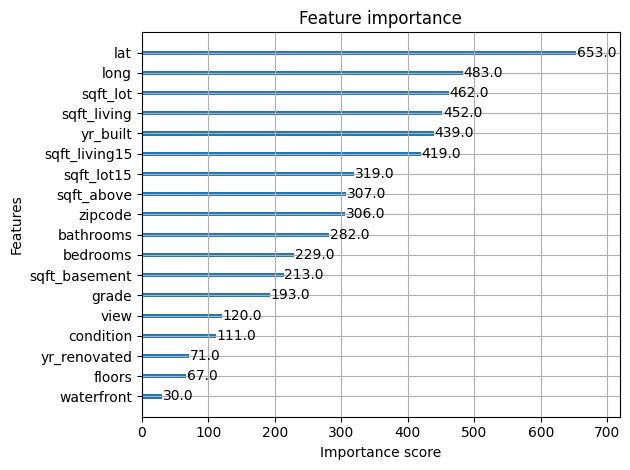

          Feature  Importance
8           grade    0.501539
2     sqft_living    0.110050
14            lat    0.103664
5      waterfront    0.088504
6            view    0.037561
15           long    0.027594
11       yr_built    0.022511
13        zipcode    0.018274
16  sqft_living15    0.018052
7       condition    0.014072
9      sqft_above    0.012876
12   yr_renovated    0.012571
1       bathrooms    0.007830
17     sqft_lot15    0.007461
3        sqft_lot    0.007381
10  sqft_basement    0.004851
4          floors    0.003361
0        bedrooms    0.001848


In [16]:

import xgboost as xgb
from xgboost import plot_importance

# Sample data creation (replace this with your actual dataset)
# Define features and target

X = df.drop(['price', 'date_sold'], axis=1)
y = df['price']

# Train XGBoost model
model = xgb.XGBRegressor()
model.fit(X, y)

# Plot feature importance
plot_importance(model)
plt.tight_layout()
plt.show()

# Get feature importance scores
importance = model.feature_importances_
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Print the sorted feature importance
print(feature_importance_df)


In [17]:
# Features selection by variance threshold


from sklearn.feature_selection import VarianceThreshold


# Drop target and non-numeric columns
X = df.drop(['price', 'date_sold'], axis=1)
# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)
# Get the selected feature names
selected_features = X.columns[selector.get_support()]
# Print the selected features
print("Selected features after applying VarianceThreshold:")
print(selected_features.tolist())


Selected features after applying VarianceThreshold:
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']


In [ ]:
# Based upon all the Models the following Featueres will be used for Modeling


              grade        
              sqft_living   
              lat   
              waterfront   
              view   
              long   
              yr_built   
              zipcode   
              condition   
              sqft_above   
              yr_renovated   
              bathrooms   
              sqft_lot15   
              sqft_lot   
              sqft_basement   
              floors   
              bedrooms   
              sqft_living 


